In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM

from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

In [40]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [20]:
from keras.utils import np_utils

In [2]:
#this function is to read, transform and join 2 data frame
#%%
def read_secom():
    path = '../secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature'+str(x+1) for x in range(len(df.columns))]
    return df


#%%
def read_labels():
    path = '../secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
df_features = read_secom()
df_target = read_labels()

#concat them vertically
#df = pd.concat([df_features,df_target],axis=1)

#df.head()

In [7]:
df_features.shape

(1567, 590)

In [6]:
df_target

,status,timestamp
0,-1,2008-07-19 11:55:00
1,-1,2008-07-19 12:32:00
2,1,2008-07-19 13:17:00
3,-1,2008-07-19 14:43:00
4,-1,2008-07-19 15:22:00
...,...,...
1562,-1,2008-10-16 15:13:00
1563,-1,2008-10-16 20:49:00
1564,-1,2008-10-17 05:26:00
1565,-1,2008-10-17 06:01:00


In [ ]:
#skipping NAN treatment
#skipping outier treatment

In [8]:
df_features

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,NaN,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [16]:
x = df_features
y = df_target.iloc[:,0]

In [17]:
y

0      -1
1      -1
2       1
3      -1
4      -1
       ..
1562   -1
1563   -1
1564   -1
1565   -1
1566   -1
Name: status, Length: 1567, dtype: int64

#### Treating missing values

In [29]:
x = x.replace(np.NaN, 0)
y = y.replace(np.NaN, 0)


#### Splitting data

In [88]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state = 1)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1096, 590)
shape of x_test:  (471, 590)
shape of y_train:  (1096,)
shape of y_test:  (471,)


## Approach 1: Random Forest Classifier

Accuracy:  93.63057324840764


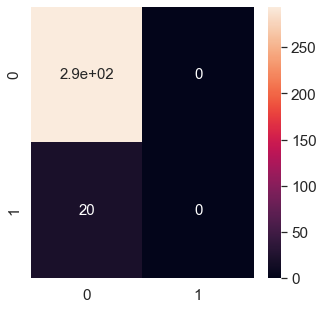

In [47]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

print("Accuracy: ", model.score(x_test,y_test)*100)

#### Oversampling

In [43]:
x_resample, y_resample  = SMOTE(random_state=1).fit_resample(x, y)

print(x_resample.shape)
print(y_resample.shape)

(2926, 590)
(2926,)


Accuracy:  100.0


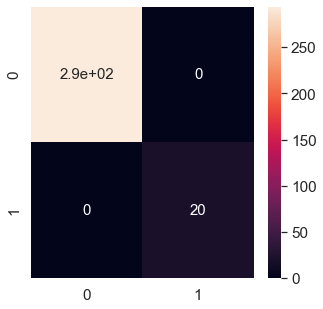

In [48]:
model = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
model.fit(x_resample, y_resample)
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

print("Accuracy: ", model.score(x_test,y_test)*100)

## Approach 2: Neural Network

In [89]:
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [90]:
# one hot encode outputs
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

count_classes = y_test_c.shape[1]
print(count_classes)

2


In [52]:
y_train_c

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [91]:
input_dim = x_train.shape[1]

model = Sequential()
model.add(Dense(400, activation='relu', input_dim=input_dim))
model.add(Dense(250, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 400)               236400    
                                                                 
 dense_25 (Dense)            (None, 250)               100250    
                                                                 
 dense_26 (Dense)            (None, 100)               25100     
                                                                 
 dense_27 (Dense)            (None, 50)                5050      
                                                                 
 dense_28 (Dense)            (None, 25)                1275      
                                                                 
 dense_29 (Dense)            (None, 2)                 52        
                                                                 
Total params: 368,127
Trainable params: 368,127
Non-tr

In [71]:
x_train

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
1005,2945.22,2570.44,2194.9556,2341.7833,2.3917,100.0,86.8100,0.1231,1.4207,0.0086,...,0.0000,0.0000,0.4976,0.0164,0.0035,3.2945,0.0552,0.0178,0.0051,32.2058
858,2938.02,2499.68,2114.6667,1549.4874,1.3393,100.0,98.7844,0.1262,1.4446,-0.0109,...,0.0045,65.2186,0.5014,0.0081,0.0024,1.6180,0.0220,0.0143,0.0045,65.2186
1485,2911.22,2556.64,2204.2889,2637.9989,1.5549,100.0,86.1089,0.1234,1.4439,-0.0094,...,0.0061,178.0405,0.4985,0.0153,0.0041,3.0670,0.0104,0.0185,0.0061,178.0405
382,3047.00,2436.01,2213.7556,1113.5599,0.7217,100.0,104.1667,0.1211,1.5608,-0.0004,...,0.0000,0.0000,0.4964,0.0107,0.0031,2.1646,0.0165,0.0318,0.0102,192.9130
1012,2992.40,2590.80,2223.9000,1745.3724,1.9974,100.0,96.7567,0.1241,1.5519,-0.0273,...,0.0000,0.0000,0.5039,0.0151,0.0037,3.0039,0.0167,0.0132,0.0039,79.1086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,3070.07,2459.22,2216.5111,871.2526,1.2366,100.0,107.4867,0.1194,1.4125,-0.0199,...,0.0000,0.0000,0.4963,0.0153,0.0037,3.0867,0.0072,0.0210,0.0065,291.8040
905,2948.57,2526.19,2216.5000,1111.5436,0.8373,100.0,99.9867,0.1205,1.4684,0.0013,...,0.0036,54.4761,0.5048,0.0118,0.0029,2.3445,0.0211,0.0115,0.0036,54.4761
1096,3062.78,2491.31,2266.8333,2040.1937,1.6558,100.0,94.8489,0.1216,1.3909,0.0053,...,0.0024,44.1194,0.5021,0.0111,0.0034,2.2065,0.0179,0.0079,0.0024,44.1194
235,3045.71,2490.25,2197.6444,1247.0334,0.7865,100.0,99.9211,0.1203,1.4257,-0.0343,...,0.0000,0.0000,0.4947,0.0121,0.0038,2.4419,-0.0034,0.0093,0.0030,272.3477


In [92]:
model.fit(x_train, y_train_c, epochs=1, batch_size=50)

22/22 [==============================] - 0s 3ms/step - loss: 14.1592 - accuracy: 0.9516


In [93]:
pred_train= model.predict(x_train)
scores = model.evaluate(x_train, y_train_c, verbose=0)
print('Accuracy on training data: {} \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(x_test)
scores2 = model.evaluate(x_test, y_test_c, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

35/35 [==============================] - 0s 2ms/step
Accuracy on training data: 1.0 
 Error on training data: 0.0
15/15 [==============================] - 0s 1ms/step
Accuracy on test data: 1.0 
 Error on test data: 0.0


In [94]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

ValueError: Found input variables with inconsistent numbers of samples: [471, 314]

15/15 [==============================] - 0s 2ms/step


<AxesSubplot:>

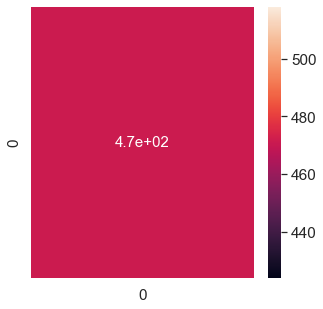

In [100]:
y_pred_c = model.predict(x_test)
cm = confusion_matrix(y_test_c.argmax(axis=1), y_pred_c.argmax(axis=1))

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})


In [ ]:
#prediction with softmax
#https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-predict-new-samples-with-your-keras-model.md
#https://stackoverflow.com/questions/63093045/keras-softmax-output-and-accuracy


In [77]:
pred_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [ ]:
#skip this for now
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)